<a href="https://colab.research.google.com/github/hucarlos08/Mathematics/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimization Basics

## Optimization

Optimization is a powerful tool used in decision-making and problem-solving across various fields, from economics to engineering. Its primary goal is to find the best solution from a set of feasible solutions.

In optimization, we often deal with problems where we aim to minimize (or maximize) a certain function. A typical unconstrained minimization problem can be represented as:

$$
\min_{\mathbf{x}\in S} f(\mathbf{x}),
$$

where:

1.  $f(\mathbf x):\mathbb{R}^n\to\mathbb R$ is the **objective function**. This function represents the cost or benefit of choosing a particular solution $\mathbf x$.
2. $S$ is the feasible set within which we are searching for a solution.
3. $\mathbf x$ is our solution vector, also known as the optimization vector.


### Basic example

#### Least Squares Regression

**Problem Statement:**

Imagine you run a business and want to understand the relationship between the amount you spend on advertising and the resulting sales. You have collected data over several months and are interested in determining a linear relationship between advertising expense and sales.

This relationship can be modeled as:

$$
\text{Sales} = m \times \text{Advertising} + b
$$

Where:
- $\text{Sales}$ represents the total sales in dollars.
- $\text{Advertising}$ is the amount of money spent on advertising in dollars.
- $m$ is the slope of the line, indicating the increase in sales for every dollar spent on advertising.
- $b$ is the y-intercept, representing the sales amount when no money is spent on advertising.

Given a dataset with $n$ observations $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$, where $x_i$ represents the advertising expense and $y_i$ represents the sales, our goal is to find the values of $m$ and $b$ that minimize the sum of squared differences (or residuals) between the observed sales and the sales predicted by the model. Mathematically, this objective can be described as:

$$
\min_{m,b} \sum_{i=1}^{n} (y_i - (m x_i + b))^2
$$

This optimization problem is known as the least squares regression. The solution provides the best-fitting line that describes the relationship between advertising expense and sales.


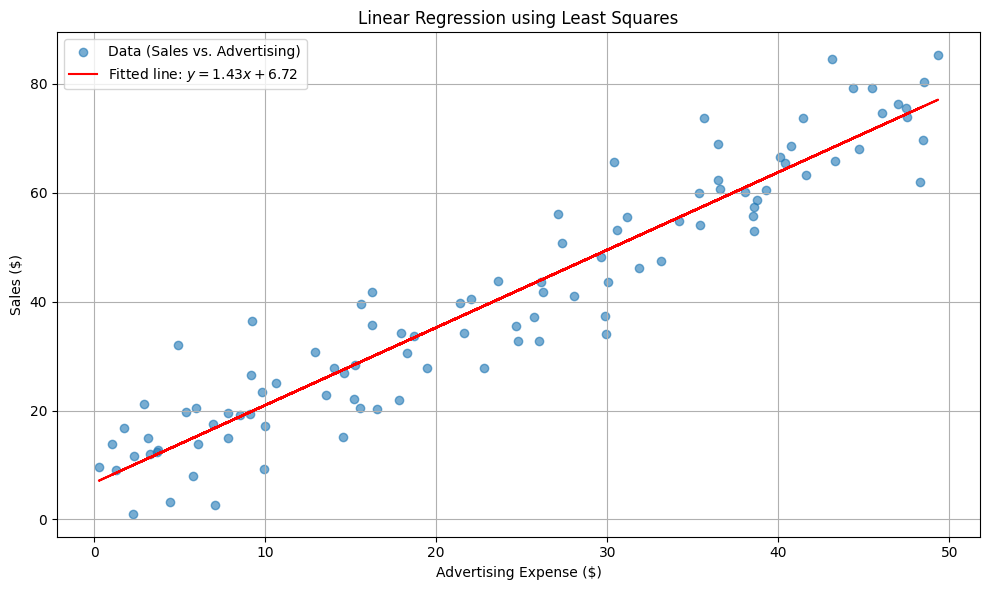

(1.4264362836603153, 6.720769260373988)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # for reproducibility

# True parameters
m_true = 1.5  # slope
b_true = 5    # intercept

# Generate advertising expenses and sales
advertising = np.random.uniform(0, 50, 100)
sales = m_true * advertising + b_true + np.random.normal(0, 8, len(advertising))  # add some noise

# Fit a linear model using least squares
A = np.vstack([advertising, np.ones(len(advertising))]).T
m_estimated, b_estimated = np.linalg.lstsq(A, sales, rcond=None)[0]

# Predict sales using the estimated model
sales_pred = m_estimated * advertising + b_estimated

# Plot the data and the fitted line
plt.figure(figsize=(10,6))
plt.scatter(advertising, sales, label='Data (Sales vs. Advertising)', alpha=0.6)
plt.plot(advertising, sales_pred, color='red', label=f'Fitted line: $y = {m_estimated:.2f}x + {b_estimated:.2f}$')
plt.title('Linear Regression using Least Squares')
plt.xlabel('Advertising Expense ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Relaxation and Approximation in Optimization

In the realm of optimization, especially when dealing with nonlinear programming methods, two concepts play a pivotal role: relaxation and approximation. These ideas are central to iterative methods that aim to find an optimal solution step by step.

1. **Relaxation**: At its core, relaxation refers to the idea of iteratively improving a solution. Imagine trying to find the lowest point in a hilly terrain in complete darkness. With each step, you try to move to a slightly lower position than your current one, ensuring that each subsequent position (or solution) is better (or at least not worse) than the previous. Mathematically, if we represent each step or position by a sequence $\{a_k\}_{k=0}^{\infty}$, it's termed as a relaxation sequence if $a_{k+1} \leq a_k, \forall k \geq 0$. In the context of optimization, this means that the value of our objective function should decrease (or stay the same) with each iteration: $f(\mathbf{x}_{k+1}) \leq f(\mathbf x_k)$ for all $k=0,1,\dots$.
    
2. **Approximation**: This concept is central to the idea of representing or replacing a complex problem with a simpler one that can be solved more easily. Going back to the analogy of finding the lowest point in a hilly terrain, imagine you don't have the precise map of the terrain, but you have a rough sketch. You use this sketch to guide your initial steps. As you continue, you refine the sketch to better represent the terrain around your current position. In optimization, approximation methods often involve using linear or quadratic models to represent a nonlinear objective function in the vicinity of the current solution. This allows for easier computation and progress towards the optimal solution, even if the original problem is highly complex. Over iterations, this approximation is refined based on new information, continually guiding the search towards the optimal solution.

Therefore, by *relaxation* and *approximation*, we can achieve the following.
1. If the objective function $f(\mathbf x)$ is lower bounded in the definition domain $S\in\mathbb R^n$, then the sequence $\{f(\mathbf x_k)\}_{k=0}^{\infty}$ must converge.
2. In any case, we can improve upon the initial value of the objective function $f(\mathbf x)$.
3. The minimization of a nonlinear objective function $f(\mathbf x)$ can be implemented by
numerical methods to a sufficiently high approximation accuracy.


### Illustrating the Concept of "Relaxation" with Gradient Descent

The concept of "Relaxation" in optimization refers to the idea of iteratively refining a solution to approach an optimal value. This iterative improvement is fundamental to many optimization algorithms, and one of the most illustrative examples is the **Gradient Descent** method.

#### Gradient Descent:

**Idea**:
Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. The basic idea is to take repeated steps in the opposite direction of the gradient (or steepest ascent) of the function at the current point, because this direction is the one in which the function decreases fastest.

**Steps**:
1. **Initialization**: Start with an initial guess $x_0$.
2. **Iteration**: In each step, update the current guess by moving a step in the direction of the negative gradient.
3. **Convergence**: Repeat the process until the guess doesn't change significantly or a maximum number of iterations is reached.

In our example, we applied the Gradient Descent algorithm to the function $f(x) = x^2$. We started with an initial guess of $x_0 = 10$ and iteratively updated our guess to approach the function's minimum. The sequence of guesses forms a **relaxation sequence**—in each step, the value of the function $f(x)$ either decreases or stays the same, capturing the essence of "relaxation" in optimization.

The plot visualizes this process. The curve represents the function $f(x) = x^2$, and the red points illustrate the path taken by the Gradient Descent algorithm. With each step, we get closer to the function's minimum, showcasing how iterative refinement (or relaxation) leads to an optimal solution.

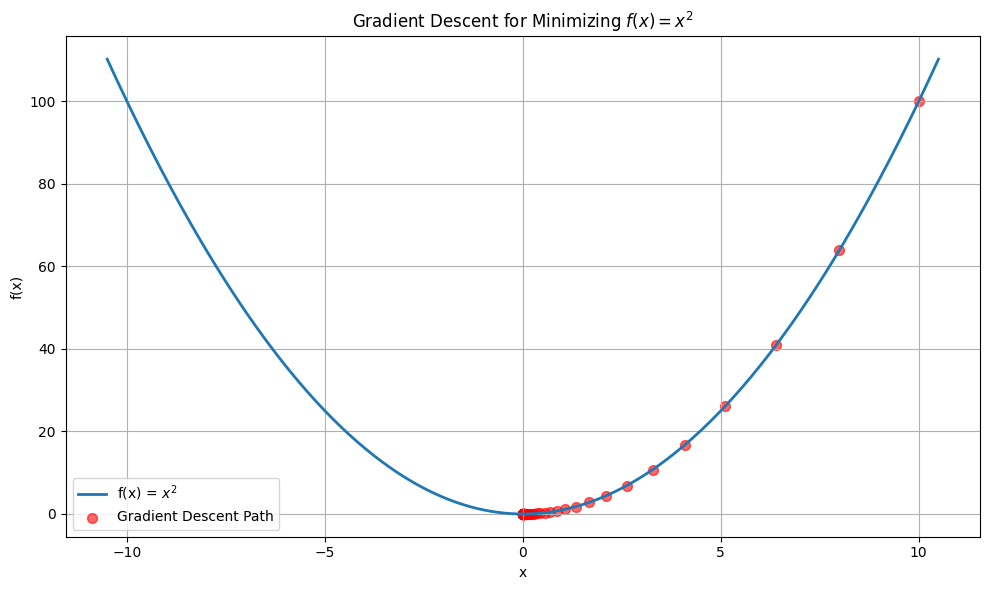

(-9.826528805262985e-07, 9.65606683606632e-13)

In [3]:
# Gradient Descent Implementation

def gradient(f, x, h=1e-5):
    """Compute the gradient of f at x."""
    return (f(x + h) - f(x)) / h

def gradient_descent(f, x0, alpha=0.1, max_iters=100, tol=1e-6):
    """Perform gradient descent for function f."""
    x = x0
    history = [x0]  # to store the path

    for _ in range(max_iters):
        grad = gradient(f, x)
        x_new = x - alpha * grad
        history.append(x_new)

        if abs(x_new - x) < tol:
            break

        x = x_new

    return x, history

# Define the function
def f(x):
    return x**2

# Apply gradient descent
x0 = 10
alpha = 0.1
x_min, history = gradient_descent(f, x0, alpha)

# Plot the function, initial point, and the path taken by gradient descent
x = np.linspace(-10.5, 10.5, 400)
y = f(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x) = $x^2$', linewidth=2)
plt.scatter(history, f(np.array(history)), c='red', marker='o', s=50, alpha=0.6, label='Gradient Descent Path')
plt.title('Gradient Descent for Minimizing $f(x) = x^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

x_min, f(x_min)



### Illustrating the Concept of "Approximation" with Polynomial Fitting

The concept of "Approximation" in optimization revolves around representing or replacing a complex problem or function with a simpler one. One of the most illustrative examples of this concept is the approximation of functions using polynomials.

#### Polynomial Approximation:

**Idea**:
Given a function, we can try to represent it (or approximate it) using a polynomial. The degree of the polynomial determines the complexity of the approximation. Higher-degree polynomials can capture more intricate patterns and curvatures but might also overfit to the noise in the data.

**Example**:
In our visualization, we considered the function $ f(x) = \sin(x) $ over the interval $[0, 2\pi]$. We then approximated this function using polynomials of degrees 1, 3, and 5:

1. The **degree 1 polynomial** provides a rudimentary approximation, essentially representing the average trend of the function.
2. The **degree 3 polynomial** introduces some curvature and starts to resemble the sine function, though not perfectly.
3. The **degree 5 polynomial** offers a much closer approximation to the original function across the entire interval.

This example showcases the power and limitations of approximation. While we can get closer to the original function by increasing the complexity of our approximating function (e.g., increasing the polynomial degree), there's always a trade-off between approximation accuracy and the risk of overfitting.


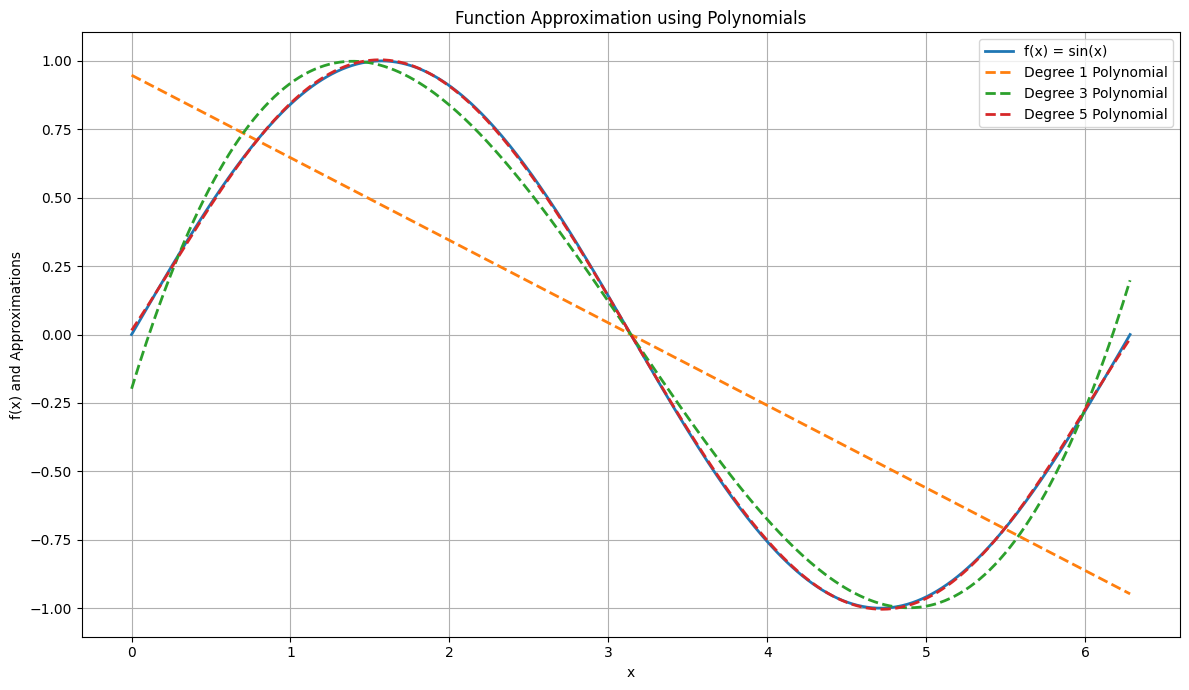

In [4]:
# Define the function and the domain
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x)

# Fit polynomials of degree 1, 3, and 5
p1 = np.poly1d(np.polyfit(x, y, 1))
p3 = np.poly1d(np.polyfit(x, y, 3))
p5 = np.poly1d(np.polyfit(x, y, 5))

# Evaluate the polynomials
y1 = p1(x)
y3 = p3(x)
y5 = p5(x)

# Plot the function and its approximations
plt.figure(figsize=(12,7))
plt.plot(x, y, label='f(x) = sin(x)', linewidth=2)
plt.plot(x, y1, '--', label='Degree 1 Polynomial', linewidth=2)
plt.plot(x, y3, '--', label='Degree 3 Polynomial', linewidth=2)
plt.plot(x, y5, '--', label='Degree 5 Polynomial', linewidth=2)
plt.title('Function Approximation using Polynomials')
plt.xlabel('x')
plt.ylabel('f(x) and Approximations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Stationary Points and Extreme Points

In the realm of optimization, understanding the nature and types of points on a function is crucial. These points, often referred to as **critical** or **stationary points**, provide valuable insights into the behavior of the function.

### Stationary Points:

A **stationary point** or **critical point** refers to a point on a differentiable function (of a single variable) where its derivative is zero. In simpler terms, it's where the function neither ascends nor descends, suggesting a flat tangent.

### Global Minimum:

For a multivariable function, a point $\mathbf x^*$ in the vector subspace $S \in \mathbb R^n$ is termed as the **global minimum** of the function $f(\mathbf{x})$ if and only if:

$$
f(\mathbf x^*) \leq f(\mathbf x), \; \forall \mathbf x \in S, \mathbf x^* \neq \mathbf x .
$$

This essentially means that $f(\mathbf x^*)$ is the smallest value the function can achieve in the domain $S$.

### Challenges in Finding Global Minimum:

The overarching goal in many optimization problems is to locate this global minimum. Yet, achieving this objective is often fraught with challenges:

- **Lack of Global Information**: We might not always have a comprehensive understanding of a function $f (\mathbf x)$ throughout its entire domain. This makes it a challenge to ascertain global properties or behaviors of the function.
  
- **Algorithmic Limitations**: Designing an algorithm that can consistently identify a global extreme point is daunting. The primary reason is the computational impracticality of comparing the value $f(\mathbf x^*)$ with every other value of the function $f(\mathbf x)$ across its domain.

However, it's worth noting that while pinpointing the global extremum can be challenging, we often have tools and methods to glean local information about an objective function $f (\mathbf x)$ around a specific point $\mathbf c$. Such local insights can be invaluable in many practical optimization scenarios.

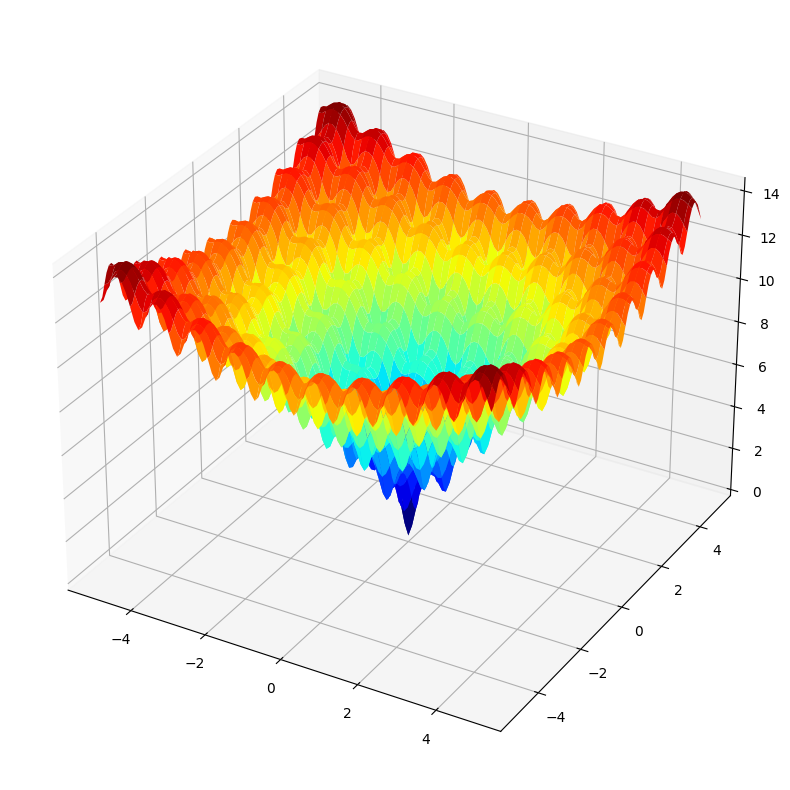

In [17]:
# ackley multimodal function
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# objective function
def objective(x, y):
	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure(figsize=(10,10))
axis = figure.add_subplot(projection = '3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

## Exploring the Local Landscape: Neighborhood

In our previous discussions, we touched upon the idea of understanding the behavior of a function locally around a specific point, especially when global information is hard to discern. This brings us to the concept of a "Neighborhood."

A **neighborhood** provides a way to formally define this local vicinity around a point. Let $\mathrm D$ be the function domain. Given a point $\mathbf c \in \mathrm D$ and a positive number $r$, the set of all points $\mathbf x$ satisfying $||\mathbf x − \mathbf c||_2 < r$ is said to be an open neighborhood with radius $r$ of the point $\mathbf c$, denoted by:

$$
\mathbf B_o(\mathbf c;r) = \{ x | x \in \mathrm D, ||\mathbf x − \mathbf c||_2 < r \}.
$$

This concept is crucial when we think about algorithms that work iteratively to improve a solution. They often do so by exploring the neighborhood of the current solution and moving to a nearby point that offers a better function value.

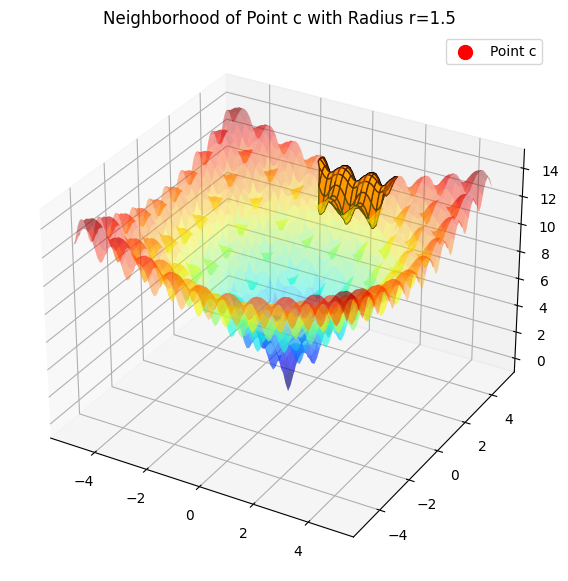

In [19]:
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# objective function
def objective(x, y):
    return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)

def neighborhood(c, r, domain):
    """Returns points in the neighborhood of c with radius r."""
    x_c, y_c = c
    x, y = domain
    mask = (norm(np.array([x - x_c, y - y_c]), axis=0) < r)
    return mask

# Choose a point c and a radius r
c = (0, 5)  # The global minimum of the Ackley function
r = 1.5

# Compute the neighborhood mask
mask = neighborhood(c, r, (x, y))

# Create a mask for the neighborhood and use it to modify the z-values outside the neighborhood
masked_results = np.where(mask, results, np.nan)

# Visualize the Ackley function, the point c, and its neighborhood
figure = plt.figure(figsize=(12, 7))
axis = figure.add_subplot(projection = '3d')
axis.plot_surface(x, y, results, cmap='jet', alpha=0.4)
axis.plot_surface(x, y, masked_results, cmap='autumn', edgecolor='k')
axis.scatter(*c, objective(*c), color='red', s=100, label='Point c')
axis.set_title(f'Neighborhood of Point c with Radius r={r}')
axis.legend()
plt.show()




## Delving Deeper into the Local Landscape: The Local Minimum

Following our exploration of the "Neighborhood" around a point on a function, it's natural to ponder about the specific characteristics this local vicinity can exhibit. One such significant characteristic is the presence of a local minimum.

A **local minimum** of a function is a point where the function's value is lower than (or equal to) its value at nearby points. In other words, if you were to stand at this point and look around within a certain radius, all you'd see would be higher ground. Formally, a point $\mathbf{c} $ is said to be a local minimum point of a function $f(\mathbf{x}) $ if:

$$
f(\mathbf c) \leq f(\mathbf c + \Delta\mathbf x),\; \forall\;\; 0< ||\Delta \mathbf x||_2 \leq r,
$$

where $\Delta \mathbf x $ is a small change in $\mathbf x $ and $r $ is a specified radius. In this context, the function value $f(\mathbf c) $ is termed the **local minimum value**.

Such points are of particular interest in optimization, as they often signify potential solutions, especially when global information is elusive or hard to determine.

Global minima found [-1.30641113]
Local minimum found 3.8374671194983834
First root found [0.]
Second root found [-2.47948183]


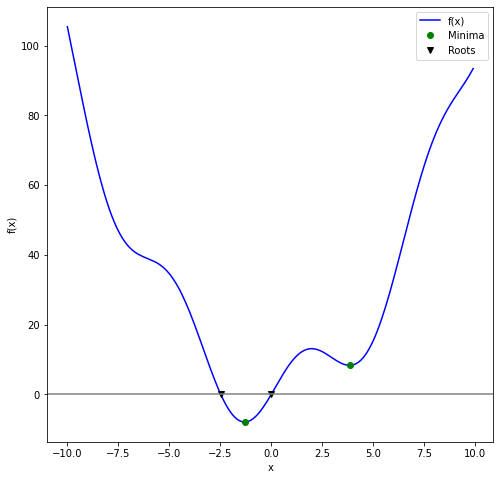

In [ ]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

x = np.arange(-10, 10, 0.1)
def f(x):
    return x**2 + 10*np.sin(x)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima found %s" % xmin_global)

# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10)
print("Local minimum found %s" % xmin_local)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")
# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")

# Plot the roots
root = optimize.root(f, 1)  # our initial guess is 1
print("First root found %s" % root.x)
root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")

# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

## Partial Differentiation and Gradients

When working with multidimensional functions in the realm of optimization, it's crucial to understand how these functions change with respect to each of their variables. These changes are often studied using partial derivatives.

### Partial Derivative

For a function $ f: \mathbb{R}^N \rightarrow \mathbb{R} $, the partial derivatives are defined as:

$$
\frac{\partial f}{\partial x_1} = \lim_{{h \to 0}} \frac{f(x_1 + h, x_2, \dots, x_n) - f(x_1, x_2, \dots, x_n)}{h}
$$
$$
\vdots
$$
$$
\frac{\partial f}{\partial x_n} = \lim_{{h \to 0}} \frac{f(x_1, x_2, \dots, x_n + h) - f(x_1, x_2, \dots, x_n)}{h}
$$

These derivatives are gathered into a vector, known as the gradient:

$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

### Second Derivatives and the Hessian Matrix

The second derivatives provide insights about the curvature of the function. For a function having continuous second derivatives, we define the Hessian matrix $ H $ as:

$$
H_f = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

Key properties of the Hessian matrix include:

1. It's a symmetric matrix.
2. Its determinant is known as the Hessian determinant.
3. It's the Jacobian matrix of the gradient of $ f $.

### The Laplacian Operator

The Laplacian is a measure of the divergence of the gradient of a function. Mathematically, it's the trace of the Hessian matrix and is defined as:

$$
\nabla^2f = \text{trace}(H_f) = \frac{\partial^2 f}{\partial x_1^2} + \frac{\partial^2 f}{\partial x_2^2} + \dots + \frac{\partial^2 f}{\partial x_n^2}
$$


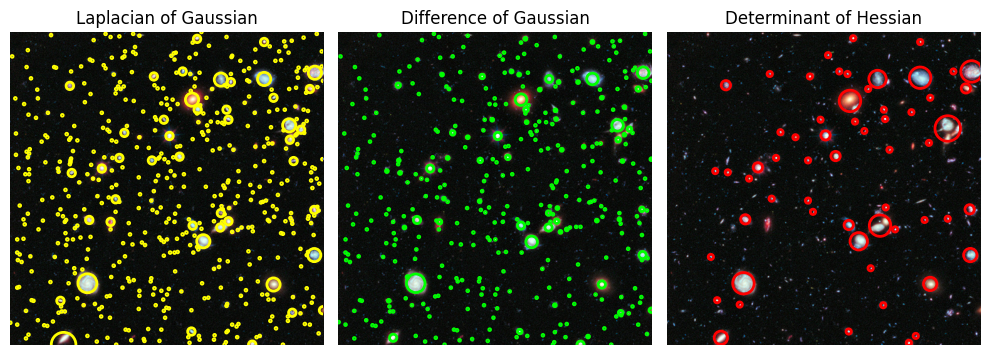

In [20]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = data.hubble_deep_field()[0:500, 0:500]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

## Optimality Conditions

Optimality conditions serve as criteria to determine the nature of a point in relation to the function's behavior (e.g., minimum, maximum, or saddle point). These conditions are usually derived from the properties of the function's gradient and Hessian matrix.

### Necessary Conditions

1. **First-Order Necessary Condition**:
   - If $\mathbf{x^*}$ is a local minimizer and $f$ is continuously differentiable in an open neighborhood of $\mathbf{x^*}$, then the gradient at that point must be zero:

     $$ \nabla f(\mathbf{x^*}) = 0 $$
   
2. **Second-Order Necessary Condition**:
   - If $\mathbf{x^*}$ is a local minimizer, $f$ has a continuous Hessian matrix $H_f$ in an open neighborhood of $\mathbf{x^*}$, then not only the gradient at that point must be zero but the Hessian matrix should also be positive semidefinite:

     $$\nabla f(\mathbf{x^*}) = 0 $$
     
     $$H_f(\mathbf{x^*}) \text{ is positive semidefinite}$$

### Sufficient Conditions

1. **Second-Order Sufficient Condition**:
   - If the Hessian matrix $H_f$ is continuous in an open neighborhood of $\mathbf{x^*}$, the gradient at that point is zero, and the Hessian matrix is positive definite, then $\mathbf{x^*}$ is a strict local minimizer of $f$.

### Implications of the Second-Order Conditions

Given a continuously differentiable function $f$ and a point $\mathbf{x^*}$ where $\nabla f(\mathbf{x^*}) = 0$:

1. If the Hessian matrix is positive definite (all eigenvalues are positive) at $\mathbf{x^*}$, then $f$ has a local minimum at $\mathbf{x^*}$.
2. If the Hessian matrix is negative definite (all eigenvalues are negative) at $\mathbf{x^*}$, then $f$ has a local maximum at $\mathbf{x^*}$.
3. If the Hessian matrix has both positive and negative eigenvalues at $\mathbf{x^*}$, then $\mathbf{x^*}$ is a saddle point for $f$.

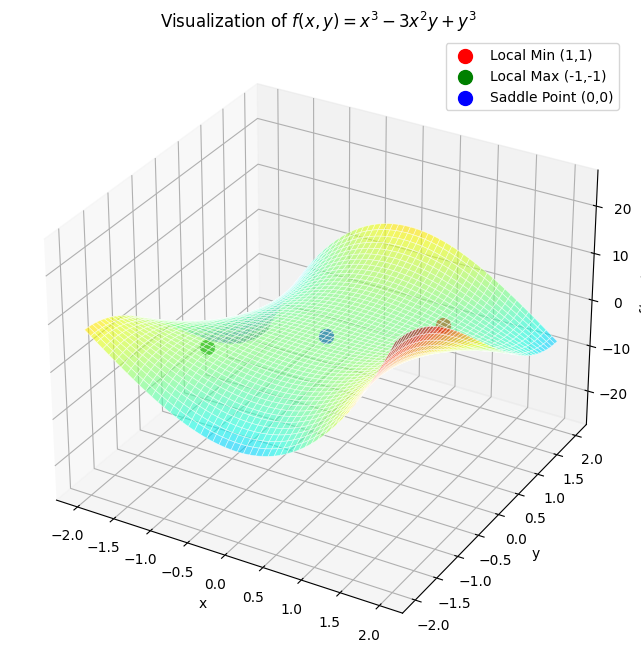

In [22]:
from matplotlib import cm

# Function definition
def f(x, y):
    return x**3 - 3*x**2*y + y**3

# Create a grid for plotting
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plotting the function
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.jet, alpha=0.6, edgecolor='w', linewidth=0.5)

# Marking the points of interest: minimum, maximum, and saddle point
ax.scatter(1, 1, f(1, 1), color='r', s=100, label='Local Min (1,1)')
ax.scatter(-1, -1, f(-1, -1), color='g', s=100, label='Local Max (-1,-1)')
ax.scatter(0, 0, f(0, 0), color='b', s=100, label='Saddle Point (0,0)')

# Decorations
ax.set_title('Visualization of $f(x,y) = x^3 - 3x^2y + y^3$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

plt.show()


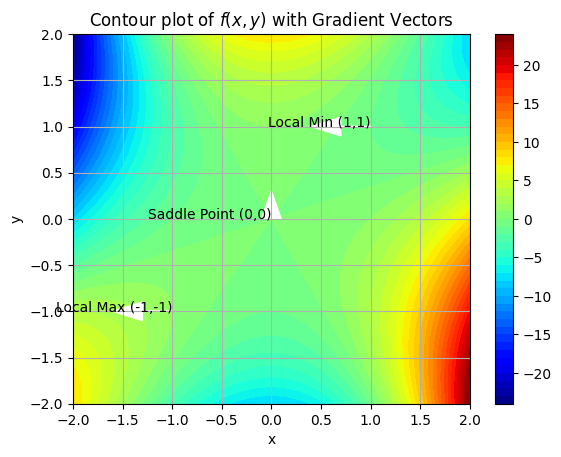

In [23]:
# Compute the gradient of the function
def gradient(x, y):
    df_dx = 3*x**2 - 6*x*y
    df_dy = 3*y**2 - 3*x**2
    return df_dx, df_dy

# Points of interest
points = [(1, 1), (-1, -1), (0, 0)]
grads = [gradient(x, y) for x, y in points]

# Plotting the contour of the function
contour = plt.contourf(X, Y, Z, 50, cmap=cm.jet)
plt.colorbar(contour)

# Plotting the gradient vectors at points of interest
for (x, y), (dx, dy) in zip(points, grads):
    plt.arrow(x, y, dx/10, dy/10, head_width=0.2, head_length=0.3, fc='white', ec='white')

# Annotate the points of interest
annotations = ['Local Min (1,1)', 'Local Max (-1,-1)', 'Saddle Point (0,0)']
for (x, y), label in zip(points, annotations):
    plt.annotate(label, (x, y), fontsize=10, ha='right')

# Decorations
plt.title('Contour plot of $f(x,y)$ with Gradient Vectors')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
